In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [39]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

#cargar datos del pkl
pkl_path = os.path.join(BASE_DIR, 'data_sintetica', 'clientes_sinteticos.pkl')
df = pd.read_pickle(pkl_path)

df

,id_cliente,fecha_primera_compra,fecha_ultima_compra,pais,canal,frecuencia_compra,recencia_dias,ticket_promedio_usd,monto_total_usd,num_categorias,devoluciones_pct,cupon_uso_pct,nps,rfm_recency,rfm_frequency,rfm_monetary,aov,intensidad,lealtad,cliente_activo
0,C-000001,2025-02-12 11:19:54.333766,2025-04-23 11:19:54.333766,Perú,email,7,117,10.34,113.74,7,2.28,3.46,20.0,117,7,113.74,10.34,0.96,1.000000,0
1,C-000002,2022-05-02 11:19:54.333766,2025-07-31 11:19:54.333766,Perú,orgánico,2,18,43.46,217.28,2,6.52,21.46,95.0,18,2,217.28,43.46,11.44,1.000000,1
2,C-000003,2024-03-10 11:19:54.333766,2025-07-11 11:19:54.333766,Perú,móvil,8,38,31.30,281.67,8,15.28,18.91,95.0,38,8,281.67,31.30,7.22,1.000000,1
3,C-000004,2024-08-18 11:19:54.333766,2025-05-13 11:19:54.333766,Perú,web,1,97,28.70,57.39,1,7.29,7.25,-32.0,97,1,57.39,28.70,0.59,1.000000,0
4,C-000005,2025-06-12 11:19:54.333766,2025-06-20 11:19:54.333766,Perú,web,5,59,20.08,140.57,5,9.11,4.45,-13.0,59,5,140.57,20.08,2.34,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-019996,2023-05-03 11:19:54.333766,2025-04-14 11:19:54.333766,Otros,web,2,126,16.11,80.53,2,9.73,14.35,20.0,126,2,80.53,16.11,0.63,1.000000,0
19996,C-019997,2025-07-30 11:19:54.333766,2025-04-10 11:19:54.333766,Chile,web,5,130,15.34,122.69,5,15.25,26.01,-79.0,130,5,122.69,15.34,0.94,1.000000,0
19997,C-019998,2025-03-27 11:19:54.333766,2025-07-21 11:19:54.333766,Perú,web,6,28,8.08,80.81,4,9.58,35.36,77.0,28,6,80.81,8.08,2.79,0.666667,1
19998,C-019999,2024-12-27 11:19:54.333766,2025-06-28 11:19:54.333766,Chile,web,3,51,27.34,109.36,2,5.27,22.20,15.0,51,3,109.36,27.34,2.10,0.666667,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_cliente            20000 non-null  object        
 1   fecha_primera_compra  20000 non-null  datetime64[ns]
 2   fecha_ultima_compra   20000 non-null  datetime64[ns]
 3   pais                  20000 non-null  object        
 4   canal                 20000 non-null  object        
 5   frecuencia_compra     20000 non-null  int32         
 6   recencia_dias         20000 non-null  int64         
 7   ticket_promedio_usd   20000 non-null  float64       
 8   monto_total_usd       20000 non-null  float64       
 9   num_categorias        20000 non-null  int64         
 10  devoluciones_pct      20000 non-null  float64       
 11  cupon_uso_pct         20000 non-null  float64       
 12  nps                   18064 non-null  float64       
 13  rfm_recency     

In [42]:
df.shape

(20000, 20)

## Preprocesamiento para PCA

In [43]:
#Identificamos cuantos valores únicos tiene cada variable
df.nunique()

id_cliente              20000
fecha_primera_compra     1804
fecha_ultima_compra       365
pais                        5
canal                       5
frecuencia_compra          17
recencia_dias             365
ticket_promedio_usd      4545
monto_total_usd         14565
num_categorias             16
devoluciones_pct         1970
cupon_uso_pct            4125
nps                       201
rfm_recency               365
rfm_frequency              17
rfm_monetary            14565
aov                      4545
intensidad               3223
lealtad                    57
cliente_activo              2
dtype: int64

---

Del diccionario de datos tenemos lo siguiente, por lo que eliminaremos esas columnas duplicadas.

* rfm_recency	= recencia_dias

* rfm_frequency	= frecuencia_compra	

* rfm_monetary	= monto_total_usd	

* aov	        = ticket_promedio_usd	

Por otro lado también eliminaremos id_cliente, ya que solo es el identifcador que codifica a cada cliente.

In [44]:
#Eliminamos las columnas
df= df.drop(columns=['id_cliente', 'rfm_recency', 'rfm_frequency', 'rfm_monetary', 'aov'])
print(df.dtypes)

fecha_primera_compra    datetime64[ns]
fecha_ultima_compra     datetime64[ns]
pais                            object
canal                           object
frecuencia_compra                int32
recencia_dias                    int64
ticket_promedio_usd            float64
monto_total_usd                float64
num_categorias                   int64
devoluciones_pct               float64
cupon_uso_pct                  float64
nps                            float64
intensidad                     float64
lealtad                        float64
cliente_activo                   int64
dtype: object


---
### Variables derivadas

Las fechas en crudo (datetime) no son directamente útiles para algoritmos como PCA o clustering, porque:

No son numéricas per se → PCA y clustering (K-Means, DBSCAN) requieren una matriz numérica. Un objeto datetime no puede usarse directamente.

El valor absoluto de la fecha no tiene interpretación útil → que un cliente comprara el 2022-05-13 vs 2023-01-20 no es comparable como distancia en el mismo sentido que "gasta 500 USD vs 1000 USD.

---

Recomendación

Eliminar las fechas en crudo (para clustering y PCA).

Mantener y usar las derivadas:

* recencia_dias (ya cuenta el df)

* antiguedad_cliente (crear: hoy – fecha_primera_compra)

In [45]:
#creación de variable antiguedad_cliente (días)

hoy = pd.to_datetime("2025-08-18")  # o datetime.today()

df["antiguedad_cliente"] = (hoy - pd.to_datetime(df["fecha_primera_compra"])).dt.days
df["antiguedad_cliente"].head(6)

0     186
1    1203
2     525
3     364
4      66
5      66
Name: antiguedad_cliente, dtype: int64

In [46]:
#Eliminamos las varaibles fechas
df= df.drop(columns=['fecha_primera_compra', 'fecha_ultima_compra'])
print(df.dtypes)

pais                    object
canal                   object
frecuencia_compra        int32
recencia_dias            int64
ticket_promedio_usd    float64
monto_total_usd        float64
num_categorias           int64
devoluciones_pct       float64
cupon_uso_pct          float64
nps                    float64
intensidad             float64
lealtad                float64
cliente_activo           int64
antiguedad_cliente       int64
dtype: object


In [47]:
#Imputamos valores para la columna nps
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # usa la media
df["nps"] = imputer.fit_transform(df[["nps"]])

In [48]:
df.isnull().sum()

pais                   0
canal                  0
frecuencia_compra      0
recencia_dias          0
ticket_promedio_usd    0
monto_total_usd        0
num_categorias         0
devoluciones_pct       0
cupon_uso_pct          0
nps                    0
intensidad             0
lealtad                0
cliente_activo         0
antiguedad_cliente     0
dtype: int64


### Escalado y conversión a dummies

In [49]:
#Variables numéricas
df_num = df.loc[:, ['frecuencia_compra', 'recencia_dias', 'ticket_promedio_usd', 'monto_total_usd', 'num_categorias', 'devoluciones_pct', 'cupon_uso_pct', 'nps', 'intensidad', 'lealtad', 'antiguedad_cliente']]
df_num.head(6)

,frecuencia_compra,recencia_dias,ticket_promedio_usd,monto_total_usd,num_categorias,devoluciones_pct,cupon_uso_pct,nps,intensidad,lealtad,antiguedad_cliente
0,7,117,10.34,113.74,7,2.28,3.46,20.0,0.96,1.0,186
1,2,18,43.46,217.28,2,6.52,21.46,95.0,11.44,1.0,1203
2,8,38,31.30,281.67,8,15.28,18.91,95.0,7.22,1.0,525
3,1,97,28.70,57.39,1,7.29,7.25,-32.0,0.59,1.0,364
4,5,59,20.08,140.57,5,9.11,4.45,-13.0,2.34,1.0,66
5,5,120,34.14,273.12,5,0.94,24.78,35.0,2.26,1.0,66


<Figure size 600x400 with 0 Axes>

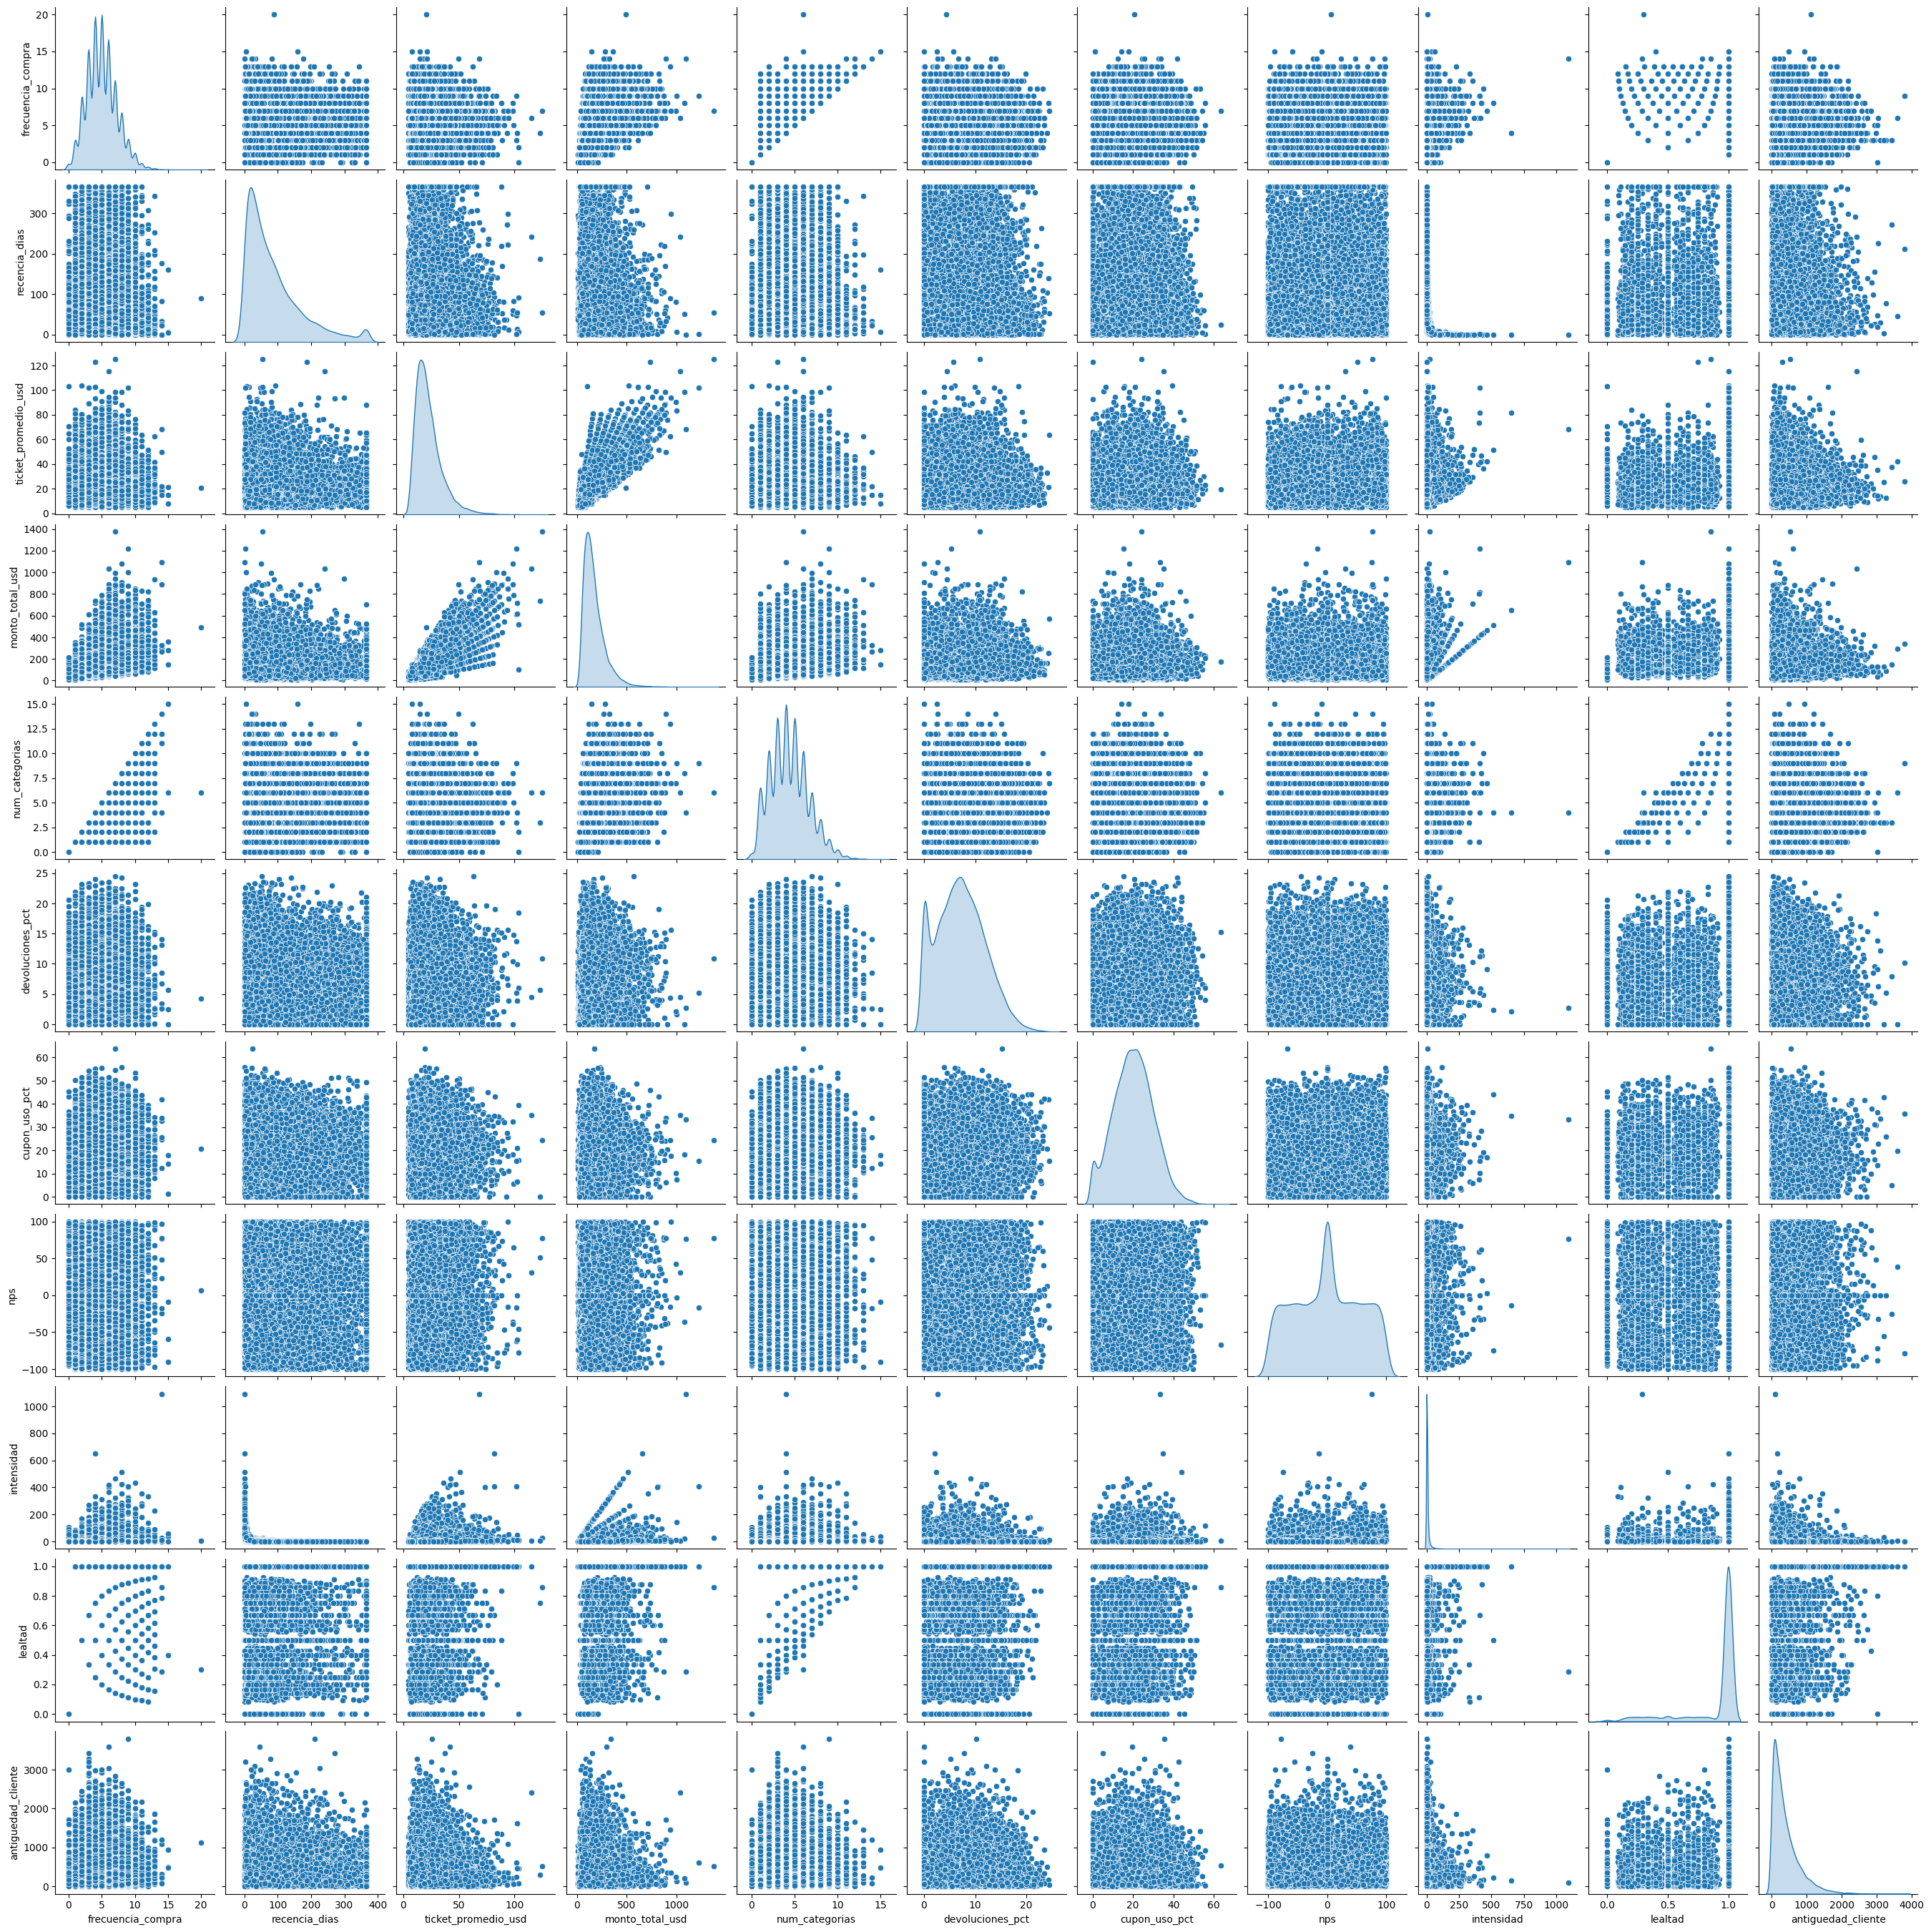

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.pairplot(df_num, diag_kind='kde');

**Dummies** 

In [51]:
#Variables categóricas
df_cat = df.loc[:, ['pais', 'canal', 'cliente_activo']]
df_cat.head(6)

,pais,canal,cliente_activo
0,Perú,email,0
1,Perú,orgánico,1
2,Perú,móvil,1
3,Perú,web,0
4,Perú,web,1
5,Perú,móvil,0


In [52]:
#Convertimos a dummies pais
t_pais = pd.get_dummies(df_cat['pais'], prefix='pais')
t_pais = t_pais.astype(int)

print(t_pais.head())

   pais_Chile  pais_Colombia  pais_México  pais_Otros  pais_Perú
0           0              0            0           0          1
1           0              0            0           0          1
2           0              0            0           0          1
3           0              0            0           0          1
4           0              0            0           0          1


In [53]:
#Convertimos a dummies canal
t_canal = pd.get_dummies(df_cat['canal'], prefix='canal')
t_canal = t_canal.astype(int)

print(t_canal.head())

   canal_ads  canal_email  canal_móvil  canal_orgánico  canal_web
0          0            1            0               0          0
1          0            0            0               1          0
2          0            0            1               0          0
3          0            0            0               0          1
4          0            0            0               0          1


---

**Escalado con z score**

Como la gráfica pairplot de distribución de datos mostraba que la mayoría de las columnas tenían una distribución cercana a la normal, se elige el z score

In [54]:
df_final_transform = pd.merge(df_num, t_pais, left_index=True, right_index=True)
df_final_transform = pd.merge(df_final_transform, t_canal,  left_index=True, right_index=True)
df_final_transform = pd.merge(df_final_transform, df_cat['cliente_activo'], left_index=True, right_index=True)

df_final_transform.head()

,frecuencia_compra,recencia_dias,ticket_promedio_usd,monto_total_usd,num_categorias,devoluciones_pct,cupon_uso_pct,nps,intensidad,lealtad,...,pais_Colombia,pais_México,pais_Otros,pais_Perú,canal_ads,canal_email,canal_móvil,canal_orgánico,canal_web,cliente_activo
0,7,117,10.34,113.74,7,2.28,3.46,20.0,0.96,1.0,...,0,0,0,1,0,1,0,0,0,0
1,2,18,43.46,217.28,2,6.52,21.46,95.0,11.44,1.0,...,0,0,0,1,0,0,0,1,0,1
2,8,38,31.30,281.67,8,15.28,18.91,95.0,7.22,1.0,...,0,0,0,1,0,0,1,0,0,1
3,1,97,28.70,57.39,1,7.29,7.25,-32.0,0.59,1.0,...,0,0,0,1,0,0,0,0,1,0
4,5,59,20.08,140.57,5,9.11,4.45,-13.0,2.34,1.0,...,0,0,0,1,0,0,0,0,1,1


In [55]:
df_final_transform.shape

(20000, 22)

In [56]:
#Preprocesamiento para PCA
scaler =StandardScaler()
X_scaled = scaler.fit_transform(df_final_transform)

In [57]:
X_scaled

array([[ 0.89502907,  0.35362235, -1.02897098, ..., -0.34023538,
        -0.81038652, -1.32498304],
       [-1.34478342, -0.83763503,  1.71698368, ...,  2.93914175,
        -0.81038652,  0.75472664],
       [ 1.34299157, -0.59697698,  0.70880709, ..., -0.34023538,
        -0.81038652,  0.75472664],
       ...,
       [ 0.44706657, -0.717306  , -1.2163459 , ..., -0.34023538,
         1.23397907,  0.75472664],
       [-0.89682092, -0.44054924,  0.38048643, ..., -0.34023538,
         1.23397907,  0.75472664],
       [ 1.79095407, -0.33225311, -0.30351496, ..., -0.34023538,
        -0.81038652,  0.75472664]], shape=(20000, 22))

**APLICACIÓN DE PCA**

In [ ]:
#Aplicar el PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#crear DataFrame con componentes y densidades
df_pca_result = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_result['densidad'] = np.exp(-((df_pca_result['PC1'])**2 + (df_pca_result['PC2'])**2))

**Varianza explicada**

In [59]:
print("Varianza explicada por cada componente: ", pca.explained_variance_ratio_ )
print("Varianza total explicada: ", pca.explained_variance_ratio_.sum())

Varianza explicada por cada componente:  [0.10696511 0.08592357]
Varianza total explicada:  0.192888679388038


In [60]:
np.cumsum(PCA().fit(X_scaled).explained_variance_ratio_)

array([0.10696511, 0.19288868, 0.26312012, 0.3320324 , 0.39673341,
       0.45317068, 0.50879905, 0.56237914, 0.61566622, 0.66723571,
       0.71779701, 0.76824935, 0.81428119, 0.85961247, 0.90472935,
       0.94957634, 0.98583021, 0.99490883, 0.99829566, 1.        ,
       1.        , 1.        ])

In [62]:
#Guardar los resultados en excel
output_excel = os.path.join(BASE_DIR, 'resultado de modelos', 'pca_resultados_clientes.xlsx')
os.makedirs(os.path.dirname(output_excel), exist_ok=True)
df_pca_result.to_excel(output_excel, index=False)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

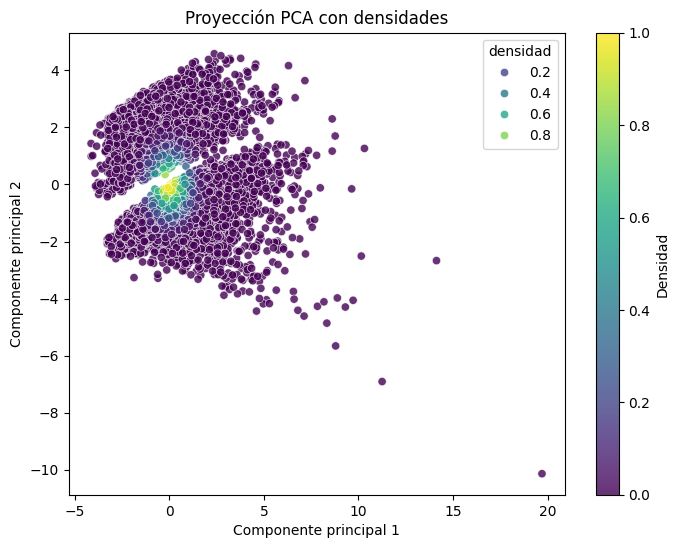

In [63]:
plt.figure(figsize=(8,6))
scatter = sns.scatterplot(data=df_pca_result, x ='PC1', y='PC2',
                          hue='densidad', palette='viridis', alpha=0.8)
plt.title('Proyección PCA con densidades')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(scatter.collections[0], label='Densidad')
plt.tight_layout

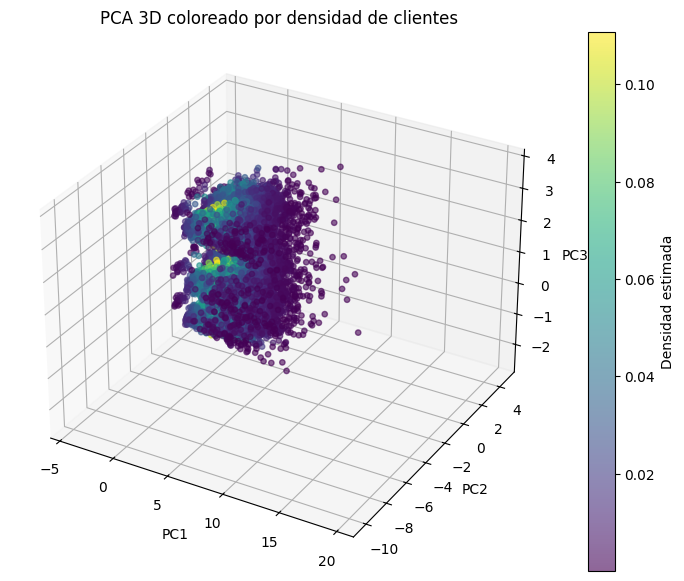

In [66]:
from sklearn.neighbors import KernelDensity
import numpy as np

# Ajustar KDE en 2D (PC1, PC2)
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(df_pca_result[['PC1','PC2']])

# Estimar densidad de cada punto
densidades = np.exp(kde.score_samples(df_pca_result[['PC1','PC2']]))

# PCA en 3D
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)
df_pca3 = pd.DataFrame(X_pca3, columns=['PC1','PC2','PC3'])
df_pca3['densidad'] = densidades

# Gráfico 3D coloreado por densidad
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_pca3['PC1'], df_pca3['PC2'], df_pca3['PC3'],
                c=df_pca3['densidad'], cmap="viridis", alpha=0.6, s=15)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA 3D coloreado por densidad de clientes")
plt.colorbar(sc, label="Densidad estimada")
plt.show()


In [77]:
# Ejemplo con 13 componentes (≈80% de varianza acumulada)
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X_scaled)

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Guardar como DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(13)])

output_PKL = os.path.join(BASE_DIR, 'resultado de modelos', 'clientes_13_pca.pkl')
os.makedirs(os.path.dirname(output_excel), exist_ok=True)
df_pca.to_pickle(output_PKL)

*Recomendaciones*

Se guardó el pkl Porque con 13 PCs ya se explica ≥80% de la varianza acumulada → retienes la mayor parte de la información original.

Cada uno de esos PCs es un resumen distinto de las 22 variables, no redundante.

Usar los 13 PCs es casi como usar las 22 variables, pero:

Sin colinealidad (los PCs son ortogonales).

Con menor ruido.

Con reducción de dimensión (22 → 13).